## Capstone 1: Instacart

In [2]:
#Run docker container
sudo docker run -d --name sparkbook -p 8881:8888 -v "$PWD":/home/jovyan/work jupyter/pyspark-notebook start.sh jupyter lab --LabApp.token=''

#Exec docker container
docker exec -it sparkbook

#Run Spark
#go on browser
localhost:8881

In [128]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
import pyspark as ps

spark = (ps.sql.SparkSession
         .builder
         .master('local[4]')
         .appName('Instacart')
         .getOrCreate()
        )

sc = spark.sparkContext

In [ ]:
sc

In [5]:
# insta_folder = '/Users/winrichsy/Desktop/Galvanize/capstone1_instacart/instacart_2017/'
insta_folder = 'instacart_2017/'


aisles_df = spark.read.csv(insta_folder+'aisles.csv',
                           header = True,
                           sep = ",",
                           inferSchema = True)

departments_df = spark.read.csv(insta_folder+'departments.csv',
                            header = True,
                            sep = ",",
                            inferSchema = True)

order_products_prior_df = spark.read.csv(insta_folder+'order_products__prior.csv',
                                     header = True,
                                     sep = ",",
                                     inferSchema = True)

order_products_train_df = spark.read.csv(insta_folder+'order_products__train.csv',
                                     header = True,
                                     sep = ",",
                                     inferSchema = True)

orders_df = spark.read.csv(insta_folder+'orders.csv',
                       header = True,
                       sep = ",",
                       inferSchema = True)

products_df = spark.read.csv(insta_folder+'products.csv',
                         header = True,
                         sep = ",",
                         inferSchema = True)

# ###
# aisles = pd.read_csv(insta_folder+'aisles.csv')
# departments = pd.read_csv(insta_folder+'departments.csv')
# order_products_prior = pd.read_csv(insta_folder+'order_products__prior.csv')
# order_products_train = pd.read_csv(insta_folder+'order_products__train.csv')
# orders = pd.read_csv(insta_folder+'orders.csv')
# products = pd.read_csv(insta_folder+'products.csv')

In [42]:
aisles_df.createOrReplaceTempView('aisles')
departments_df.createOrReplaceTempView('departments')
order_products_prior_df.createOrReplaceTempView('orders_prior')
orders_df.createOrReplaceTempView('orders')
products_df.createOrReplaceTempView('products')

In [10]:
print('aisles_df rows: ', aisles_df.count())
aisles_df.printSchema()

print('departments_df rows: ', departments_df.count())
departments_df.printSchema()

print('order_products_prior_df rows: ', order_products_prior_df.count())
order_products_prior_df.printSchema()

print('order_products_train_df rows: ', order_products_train_df.count())
order_products_train_df.printSchema()

print('orders_df rows: ', orders_df.count())
orders_df.printSchema()

print('products: ', products_df.count())
products_df.printSchema()

aisles_df rows:  134
root
 |-- aisle_id: integer (nullable = true)
 |-- aisle: string (nullable = true)

departments_df rows:  21
root
 |-- department_id: integer (nullable = true)
 |-- department: string (nullable = true)

order_products_prior_df rows:  32434489
root
 |-- order_id: integer (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- add_to_cart_order: integer (nullable = true)
 |-- reordered: integer (nullable = true)

order_products_train_df rows:  1384617
root
 |-- order_id: integer (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- add_to_cart_order: integer (nullable = true)
 |-- reordered: integer (nullable = true)

orders_df rows:  3421083
root
 |-- order_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- eval_set: string (nullable = true)
 |-- order_number: integer (nullable = true)
 |-- order_dow: integer (nullable = true)
 |-- order_hour_of_day: integer (nullable = true)
 |-- days_since_prior_order: double (nullable

In [12]:
aisles_df.show(10)

+--------+--------------------+
|aisle_id|               aisle|
+--------+--------------------+
|       1|prepared soups sa...|
|       2|   specialty cheeses|
|       3| energy granola bars|
|       4|       instant foods|
|       5|marinades meat pr...|
|       6|               other|
|       7|       packaged meat|
|       8|     bakery desserts|
|       9|         pasta sauce|
|      10|    kitchen supplies|
+--------+--------------------+
only showing top 10 rows



In [22]:
departments_df.show(10)

+-------------+---------------+
|department_id|     department|
+-------------+---------------+
|            1|         frozen|
|            2|          other|
|            3|         bakery|
|            4|        produce|
|            5|        alcohol|
|            6|  international|
|            7|      beverages|
|            8|           pets|
|            9|dry goods pasta|
|           10|           bulk|
+-------------+---------------+
only showing top 10 rows



In [32]:
order_products_prior_df.show(25)

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       2|     33120|                1|        1|
|       2|     28985|                2|        1|
|       2|      9327|                3|        0|
|       2|     45918|                4|        1|
|       2|     30035|                5|        0|
|       2|     17794|                6|        1|
|       2|     40141|                7|        1|
|       2|      1819|                8|        1|
|       2|     43668|                9|        0|
|       3|     33754|                1|        1|
|       3|     24838|                2|        1|
|       3|     17704|                3|        1|
|       3|     21903|                4|        1|
|       3|     17668|                5|        1|
|       3|     46667|                6|        1|
|       3|     17461|                7|        1|
|       3|     32665|                8|        1|


In [19]:
orders_df.show(20)

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
| 2539329|      1|   prior|           1|        2|                8|                  null|
| 2398795|      1|   prior|           2|        3|                7|                  15.0|
|  473747|      1|   prior|           3|        3|               12|                  21.0|
| 2254736|      1|   prior|           4|        4|                7|                  29.0|
|  431534|      1|   prior|           5|        4|               15|                  28.0|
| 3367565|      1|   prior|           6|        2|                7|                  19.0|
|  550135|      1|   prior|           7|        1|                9|                  20.0|
| 3108588|      1|   prior|           8|        1|               14|            

In [20]:
products_df.show(20)

+----------+--------------------+--------+-------------+
|product_id|        product_name|aisle_id|department_id|
+----------+--------------------+--------+-------------+
|         1|Chocolate Sandwic...|      61|           19|
|         2|    All-Seasons Salt|     104|           13|
|         3|Robust Golden Uns...|      94|            7|
|         4|Smart Ones Classi...|      38|            1|
|         5|Green Chile Anyti...|       5|           13|
|         6|        Dry Nose Oil|      11|           11|
|         7|Pure Coconut Wate...|      98|            7|
|         8|Cut Russet Potato...|     116|            1|
|         9|Light Strawberry ...|     120|           16|
|        10|Sparkling Orange ...|     115|            7|
|        11|   Peach Mango Juice|      31|            7|
|        12|Chocolate Fudge L...|     119|            1|
|        13|   Saline Nasal Mist|      11|           11|
|        14|Fresh Scent Dishw...|      74|           17|
|        15|Overnight Diapers..

In [115]:
#1. Querying top 20 most ordered items
query = '''SELECT products.product_name, COUNT(orders_prior.product_id) as orders
            FROM orders_prior
            LEFT JOIN products
            ON products.product_id = orders_prior.product_id
            GROUP BY products.product_name
            ORDER BY orders DESC
            LIMIT 20'''

product_orders_count = spark.sql(query)
product_orders_count.show()

+--------------------+------+
|        product_name|orders|
+--------------------+------+
|              Banana|472565|
|Bag of Organic Ba...|379450|
|Organic Strawberries|264683|
|Organic Baby Spinach|241921|
|Organic Hass Avocado|213584|
|     Organic Avocado|176815|
|         Large Lemon|152657|
|        Strawberries|142951|
|               Limes|140627|
|  Organic Whole Milk|137905|
| Organic Raspberries|137057|
|Organic Yellow Onion|113426|
|      Organic Garlic|109778|
|    Organic Zucchini|104823|
| Organic Blueberries|100060|
|      Cucumber Kirby| 97315|
|  Organic Fuji Apple| 89632|
|       Organic Lemon| 87746|
|Apple Honeycrisp ...| 85020|
|Organic Grape Tom...| 84255|
+--------------------+------+



Text(0.5, 1.0, '')

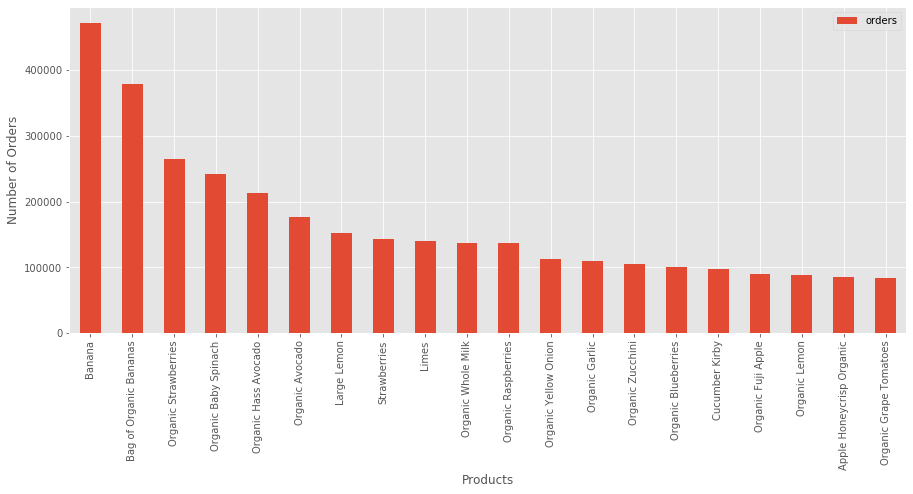

In [126]:
product_orders_count_df = product_orders_count.toPandas()

product_orders_count_df.plot(kind='bar', x='product_name', y='orders', figsize=(15,6))
plt.xlabel('Products')
plt.ylabel('Number of Orders')
plt.title('')

In [103]:
#2. Querying top item ordered from each department
query = ''' select *
            from (
                SELECT *, 
                dense_rank() OVER (PARTITION BY department ORDER BY orders DESC) as product_rank
                FROM (
                    SELECT products.product_name, departments.department, COUNT(orders_prior.product_id) as orders
                    FROM orders_prior
                    LEFT JOIN products
                    ON products.product_id = orders_prior.product_id
                    LEFT JOIN departments
                    ON products.department_id = departments.department_id
                    GROUP BY products.product_name, departments.department
                    ) tmp
                ORDER BY orders DESC)
            where product_rank = 1
        '''

most_prod_dept = spark.sql(query)
most_prod_dept = most_prod_dept.drop('product_rank')
most_prod_dept.show()
#sql with?

+--------------------+---------------+------+
|        product_name|     department|orders|
+--------------------+---------------+------+
|              Banana|        produce|472565|
|  Organic Whole Milk|     dairy eggs|137905|
|Sparkling Water G...|      beverages| 75886|
|     Original Hummus|           deli| 71314|
|100% Whole Wheat ...|         bakery| 60816|
|         Blueberries|         frozen| 55946|
|Boneless Skinless...|   meat seafood| 50281|
|Extra Virgin Oliv...|         pantry| 50255|
| Organic Black Beans|   canned goods| 38001|
|100% Recycled Pap...|      household| 27864|
|  Honey Nut Cheerios|      breakfast| 26741|
|Lightly Salted Ba...|         snacks| 24950|
|      Marinara Sauce|dry goods pasta| 19998|
|Organic Sea Salt ...|  international| 10345|
|         Dried Mango|           bulk| 10150|
|Baby Food Stage 2...|         babies|  8793|
|Organic Riced Cau...|        missing|  8366|
|     Sauvignon Blanc|        alcohol|  8246|
|  Lavender Hand Soap|  personal c

In [ ]:
#colors
colors=['whitesmoke']

TypeError: 'AxesSubplot' object is not subscriptable

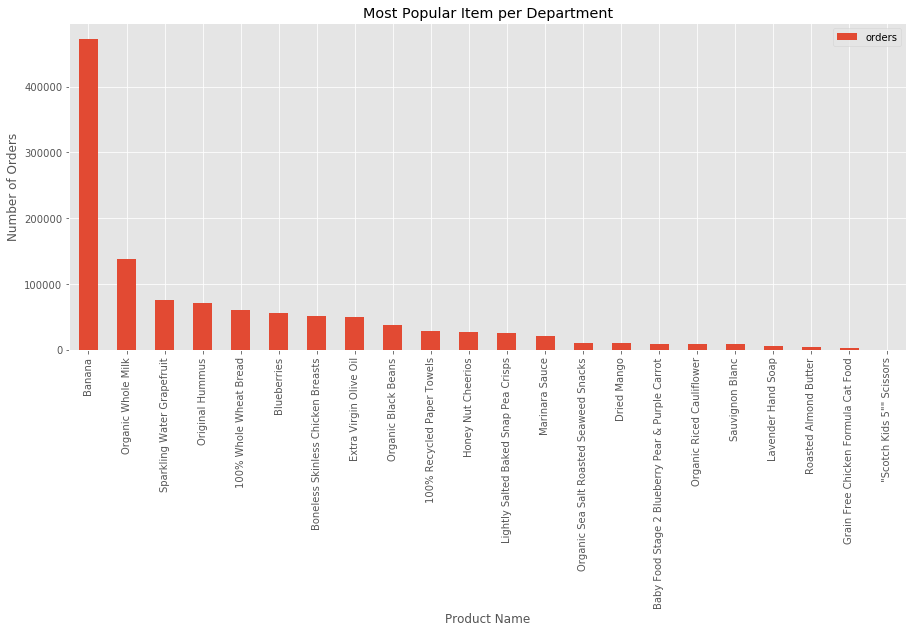

In [139]:
most_prod_dept_df = most_prod_dept.toPandas()
bar = most_prod_dept_df.plot(kind='bar', x='product_name', y='orders', figsize=(15,6), stacked=True)
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.title('Most Popular Item per Department')
for i in range(len(most_prod_dept_df)):
    bar[i].set_color(colors[0])
# plt.legend(most_prod_dept_df.loc[:,'department'])

In [ ]:
fig, ax = plt.subplots(figsize=*=(15,6))


In [123]:
# query = ''' select *
#             from (
#                 SELECT *, 
#                 dense_rank() OVER (PARTITION BY department ORDER BY orders DESC) as product_rank
#                 FROM (
#                     SELECT products.product_name, departments.department, COUNT(orders_prior.product_id) as orders
#                     FROM orders_prior
#                     LEFT JOIN products
#                     ON products.product_id = orders_prior.product_id
#                     LEFT JOIN departments
#                     ON products.department_id = departments.department_id
#                     GROUP BY products.product_name, departments.department
#                     ) tmp
#                 ORDER BY department DESC)
#             where product_rank <= 3
#         '''
# spark.sql(query).show()

+--------------------+-------------+------+------------+
|        product_name|   department|orders|product_rank|
+--------------------+-------------+------+------------+
|Lightly Salted Ba...|       snacks| 24950|           1|
|Original Veggie S...|       snacks| 16850|           2|
| Sea Salt Pita Chips|       snacks| 16626|           3|
|Organic Strawberries|      produce|264683|           3|
|              Banana|      produce|472565|           1|
|Bag of Organic Ba...|      produce|379450|           2|
|Instant Action Ca...|         pets|  1492|           3|
|Grain Free Turkey...|         pets|  1560|           2|
|Grain Free Chicke...|         pets|  1825|           1|
|  Lavender Hand Soap|personal care|  5941|           1|
|  Premium Epsom Salt|personal care|  4228|           3|
|Lemon Verbena Han...|personal care|  4951|           2|
|Creamy Peanut Butter|       pantry| 20033|           3|
|Extra Virgin Oliv...|       pantry| 50255|           1|
|Creamy Almond Butter|       pa